<font size="7">Sentiment Analysis of Mvie Reviews</font>



<font size="5">Importing Libraries.</font>


<font size="4">Like Pandas, matplot, seaborn, plotly, re, nltk, sklearn and Wordcloud</font>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px                                            #to generate various visualization
from matplotlib import style                                           #to set style for plot
style.use('ggplot')
import re                                                               #Regular expression (regex function) - for matching text pattern
from nltk.tokenize import word_tokenize                                  #split the words like 'One', 'of' etc
from nltk.stem import PorterStemmer                                      #stemming means process of producing structural variants of root/base
import nltk                                                              #natural language toolkit(nltk)- python library for NLP
nltk.download('stopwords')
from nltk.corpus import stopwords                                         #to remove all stopword (as, a, an, the)
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud                                          #display most frequent word from data
from sklearn.feature_extraction.text import TfidfVectorizer              #convert collection of raw data into martix (Term Frequency-Inverse Document Frequency)
from sklearn.model_selection import train_test_split                     #perform train test split on data        


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size="5">Read Data set IMDB</font>


In [2]:
df = pd.read_csv('IMDB Dataset.csv')                                     #reading file
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape                                                              #to see size of dataset

(50000, 2)

In [4]:
df.info()                                                            #can see no.of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<font size="5">Plot graph using countplot</font>


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

Text(0.5, 1.0, 'Sentiment Distribution')

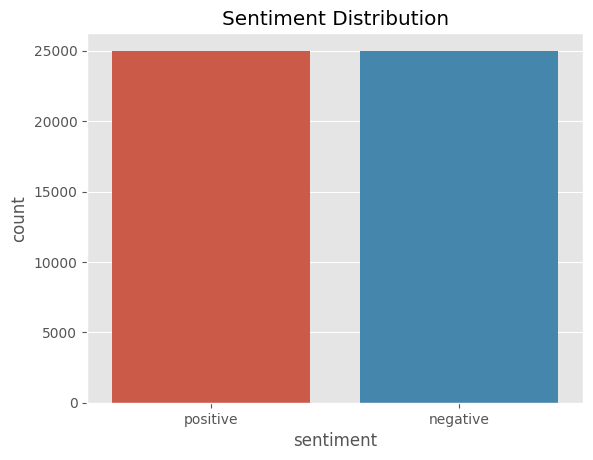

In [5]:

sns.countplot(x='sentiment',data=df)                               #countplot to view the count of different sentiments in data
plt.title('Sentiment Distribution')                                #title for image

<font size="5">See 1st five reviews from datset</font>


In [6]:

for i in range(5):
    print("Review:",[i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment:",df['sentiment'].iloc[i],"\n\n")

Review: [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is du

<font size="5">Check no of words in review column</font>


In [7]:

def no_of_word(words):                                              #defining function
    word_count=len(words)
    return word_count

In [8]:
df['wordcount']=df['review'].apply(no_of_word)                     #applying dataframe to review column

In [9]:
df.head()                                                          #see wordcount

,review,sentiment,wordcount
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


<font size = "5">Using wordcount see distribution of positive and negative sentiment</font>

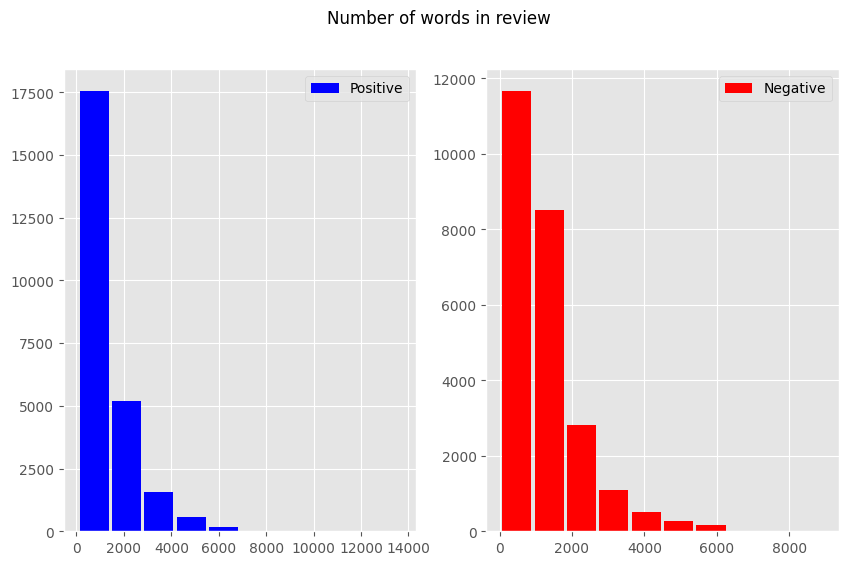

In [10]:

fig,ax = plt.subplots(1,2,figsize=(10,6))                        #'ax' is axes, 1 and 2 are row and columns of sublpots, and 10 and 6 is figure_size in inches
ax[0].hist(df[df['sentiment'] == 'positive']['wordcount'], label='Positive', color='blue', rwidth=0.9)         #select wordcount column from df for rows where sentimnet is positive
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['wordcount'], label='Negative', color='red', rwidth=0.9)          #select wordcount column from df for rows where sentimnet is negative
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()


<font size = "5">Using wordcount see Visualization the length of positive and negative sentiment</font>

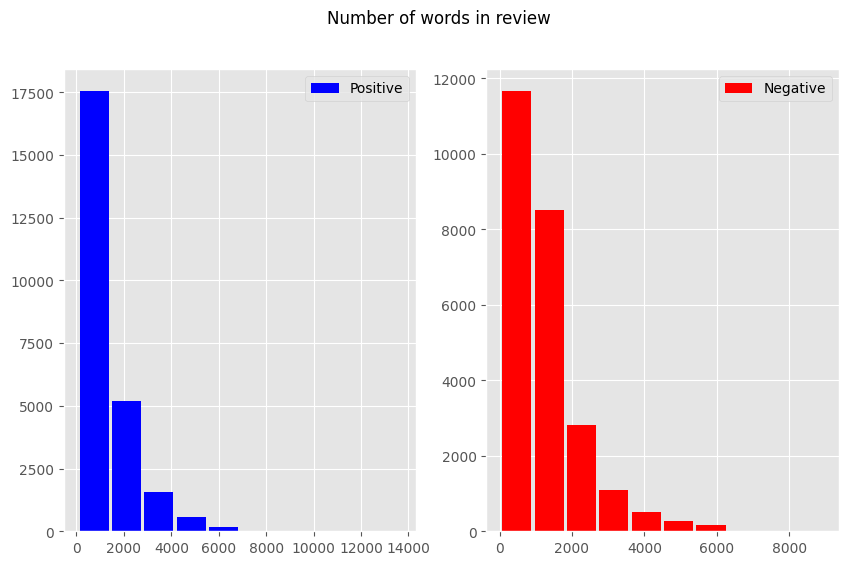

In [11]:
#plots histograms based on the length (number of characters) of reviews
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9)            #string length of positive reviews
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

<font size = "5">Replacing sentiment i.e positive is 1 and negative is zero</font>

In [12]:

df.sentiment.replace("positive", 1, inplace = True)
df.sentiment.replace("negative", 0, inplace = True)

In [13]:
df.head()

,review,sentiment,wordcount
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [14]:
df.shape

(50000, 3)

<font size = "5">Data Pre processing - NLP</font>

In [15]:
#Now process "Text data". Data process is done to make data into usable format
def data_processing(text):                                                       #Defining Text processing function
    #text = text.lower()
    text = re.sub('<br\s*[/]?>', '', text)                                       #removing break tags from reviews
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)      #removing any URLs
    text = re.sub(r'\@\w+', '', text)                                            # Remove mentions (usernames starting with @)
    text = re.sub(r'\#\w+', '', text)                                            # Remove hashtags (words starting with #)
    #text = re.sub(r'[\w\s]', '', text)
    #text_tokens = word_tokenize(text)
    #filtered_text = [w for w in text_tokens if not w in stop_words]
    return text                                                                  #returning text
    #return "".join(filtered_text)

                                                                                     

In [16]:
df.review = df['review'].apply(data_processing)                                  #applying data processing on data frame on review column

In [18]:
# Function to remove punctuation
import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [19]:
# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_punctuation)
df.head()                                                         #and viewing it

,review,sentiment,wordcount
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production The filming tech...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically theres a family where a little boy J...,0,748
4,Petter Matteis Love in the Time of Money is a ...,1,1317


In [18]:
#def remove_br_tags(text):
    #return re.sub(r'<br\s*[/]?>', ' ', text)

In [19]:
#df['review'] = df['review'].apply(remove_br_tags)
#df.head()

<font size = "5">Checking Duplicate Entries</font>

In [20]:
#Now check duplicates in our data - df.duplicated(): This returns a boolean Series indicating whether each row in the DataFrame is a duplicate of a previous row (i.e., it returns True for duplicated rows and False otherwise)
duplicated_count = df.duplicated().sum()            #df.duplicated().sum(): This calculates the sum of the boolean Series obtained from df.duplicated()
print("Number of duplicate entries:", duplicated_count)

Number of duplicate entries: 419


In [21]:
df = df.drop_duplicates('review')          #removing duplicate entries
df.head()

,review,sentiment,wordcount
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production The filming tech...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically theres a family where a little boy J...,0,748
4,Petter Matteis Love in the Time of Money is a ...,1,1317


In [24]:
df.shape

(49580, 3)

<font size = "5">Perform Stemming</font>

In [22]:
#Perform stemming on data using Porter Stemmer
stemmer = PorterStemmer()                  #Porter Stemmer is a widely used stemming algorithm that reduces words to their root or base form e.g running to run
def stemming(data):                        #defing function
    text = [stemmer.stem(word) for word in data]            #applies stemming to each word in the input list data using a list comprehension. It creates a new list (text) where each word is replaced by its stemmed form using the stemmer.stem(word) method.
    return data


In [23]:
#apply stemming into the dataframe (review column)
df.review = df['review'].apply(lambda x: stemming(x))         #lambda function that takes each element x of the 'review' column and applies the stemming function to it.

In [25]:
df['wordcount'] = df['review'].apply(no_of_word)             #applying wordcount to see changes in no of words


In [26]:
df.head()

,review,sentiment,wordcount
0,One of the other reviewers has mentioned that ...,1,1665
1,A wonderful little production The filming tech...,1,936
2,I thought this was a wonderful way to spend ti...,1,874
3,Basically theres a family where a little boy J...,0,688
4,Petter Matteis Love in the Time of Money is a ...,1,1237


<font size = "5">Separate positive and negative reviews</font>

In [27]:
#Separate the positive reviews
pos_reviews = df[df.sentiment == 1]
pos_reviews.head ()

,review,sentiment,wordcount
0,One of the other reviewers has mentioned that ...,1,1665
1,A wonderful little production The filming tech...,1,936
2,I thought this was a wonderful way to spend ti...,1,874
4,Petter Matteis Love in the Time of Money is a ...,1,1237
5,Probably my alltime favorite movie a story of ...,1,628


<font size = "5">Check prominent words used in positive reviews </font>

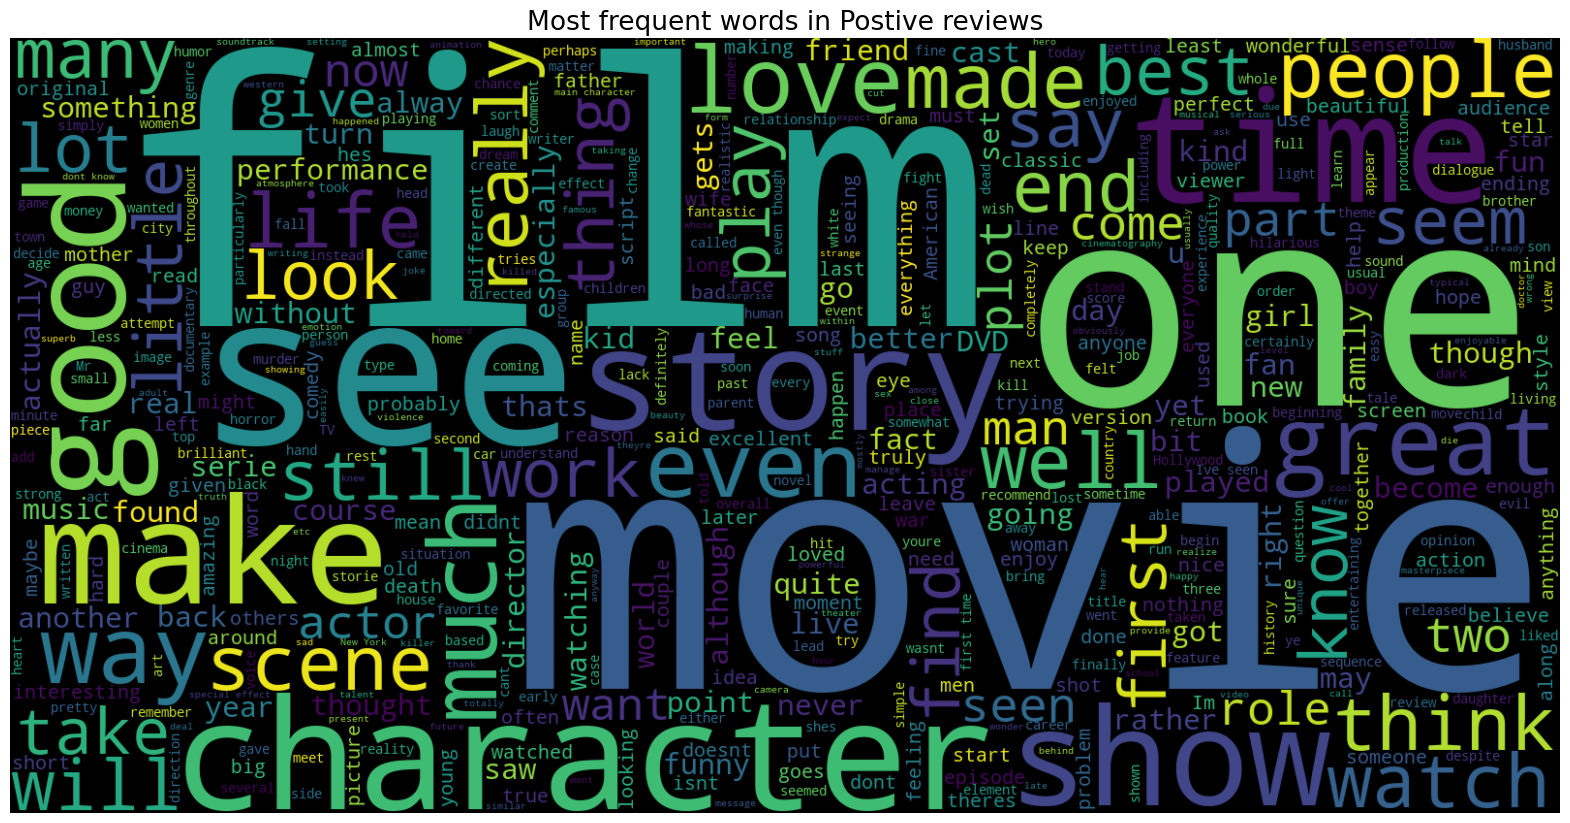

In [28]:
#Now use wordcloud to visualize positive reviews
text = ''.join ([word for word in pos_reviews['review']])            #it concatenates all the words from the 'review' column of the DataFrame pos_reviews into a single string.
plt.figure(figsize=(20,15), facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)          #generate(text) method processes the input text and generates the word cloud.
plt.imshow(wordcloud, interpolation='bilinear')                          #This line displays the word cloud using imshow with bilinear interpolation.
plt.axis('off')
plt.title('Most frequent words in Postive reviews', fontsize= 19)
plt.show()

In [33]:
#from collections import Counter
#count = Counter()

In [34]:
#for text in pos_reviews['review'].values:
    #for word in text.split():
        #count[word] += 1
        #count.most_common(2)

In [35]:
#pos_words = pd.DataFrame(count.most_common(2))
#pos_words.columns = ['word', 'count']
#pos_words.head()

In [36]:
#px.bar(pos_words, x = 'count', y = 'word', title = 'Commmon words in positive reviews', color='word')

In [29]:
#separating neagtive reviews
neg_reviews = df[df.sentiment==0]
neg_reviews.head()

,review,sentiment,wordcount
3,Basically theres a family where a little boy J...,0,688
7,This show was an amazing fresh innovative ide...,0,895
8,Encouraged by the positive comments about this...,0,644
10,Phil the Alien is one of those quirky films wh...,0,519
11,I saw this movie when I was about 12 when it c...,0,893


<font size = "5">Check prominent words used in negative reviews </font>

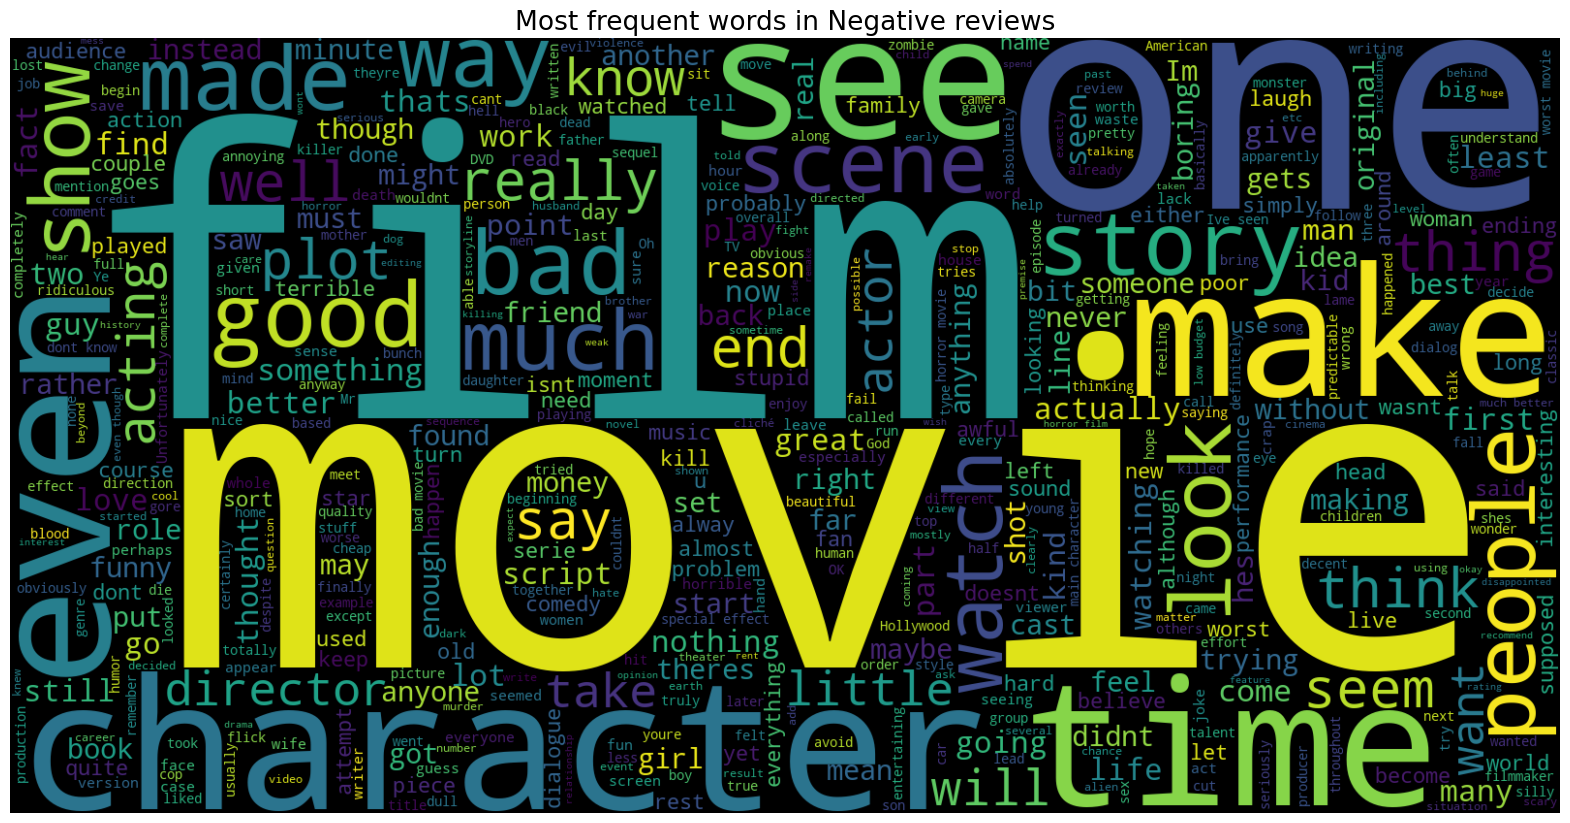

In [30]:
#word cloud
text = ''.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor= 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative reviews', fontsize= 19)
plt.show()

In [30]:
#count = Counter()
#for text in neg_reviews['review'].values:
   # for word in text.split:
    #    count[word] += 1
#count.most_common(15)

In [31]:
#neg_words = pd.DataFrame(count.most_common(15))
#neg_words.columns = ['word','count']
#neg_words.head()

In [32]:
#px.bar(neg_words, x = 'count', y = 'word', title = 'Commmon words in negative reviews', color='word')

<font size = "5">Spliting the Data into X and Y </font>

In [31]:
#split the data into X and Y 
X = df['review']                              # X contains verified reviews of users
Y = df['sentiment']                           # Y (label)contains feedback of user in term of sentiment

In [32]:
#Vectorize the data and it basically check the signficant word which makes sentence positive or negative
vect = TfidfVectorizer()                     #is used to convert a collection of raw documents to a matrix of TF-IDF features.
X = vect.fit_transform(df['review'])         #This fits the vectorizer on the 'review' column of the DataFrame df and transforms the text data into a sparse matrix of TF-IDF features. The resulting matrix X represents each document (row) as a vector of TF-IDF values for each term (word) in the entire collection of documents.

In [33]:
#Split the data into training and testing set with test size of 30%(0.3) - 30% of data be used for testing
x_train, x_text, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)         #random - the split is the same every time you run the code

In [34]:
#print size of training and testing data
print("Size of x_train", (x_train.shape))
print("Size of y_train", (y_train.shape))
print("Size of x_test", (x_text.shape))
print("Size of y_test", (y_test.shape))


Size of x_train (34706, 221225)
Size of y_train (34706,)
Size of x_test (14874, 221225)
Size of y_test (14874,)


<font size = "5">Neural Networks in Sentiment Analysis</font>

In [35]:
#For training Neural Networks, take smaller subset of entire data to make running easier and also to reduce computations
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_text[:250]
y_test = y_test[:250]

In [36]:
#Now print reduce training and testing data
print("Size of x_train", (x_train.shape))
print("Size of x_test", (x_text.shape))
print("Size of y_train", (y_train.shape))
print("Size of y_test", (y_test.shape))

Size of x_train (1000, 221225)
Size of x_test (14874, 221225)
Size of y_train (1000,)
Size of y_test (250,)


In [37]:
#Convert x data into nd-array - (tfid) - convert sparse matrices to dense arrays
x_train = x_train.toarray()                 #toarray() is like squishing down the table, removing all the empty spaces, and giving you a regular table
x_test = x_test.toarray()                   #where every word is listed for each text making it easier for some computer programs to understand and work with.

<font size = "5">Import libraries for Neural Networks</font>

In [38]:
#import libraries to create neural networks
import keras
from keras.models import Sequential                 #importing sequentional, it help to create NN model layer by layer
from keras.layers import Dense                  #define dense layer in NN, Dense means layer where each neuron is connected to every neuron in previous layers

<font size = "5">Defining Neural Networks </font>

In [39]:

model = Sequential()                                           #Adding layers to or model
model.add(Dense(units=16, activation='relu', input_dim = x_train.shape[1]))     #Add first dense layer with 16 no. of neurons with relu activation function and for 1st layer we also need to specify input dimension
   #relu-it adds non linearity in model and accept positive values and if negative value appear it directly passes to zero
   #x_train.shape gives you the dimensions of this matrix, where [0] would be the number of rows (examples) and [1] is the number of columns (features or unique words).
model.add(Dense(units=8, activation='relu'))                               #Add second layer and this is hidden layer with 8 neurons
model.add(Dense(units=1, activation='sigmoid'))                            #Add third layer - the Output layer, with 1 neuron and sigmoid activation fxn
#The sigmoid function outputs values in the range of (0, 1), mapping any real-valued number to the interval (0, 1). 
#This is particularly useful for binary classification tasks, where the goal is to predict probabilities for two classes (e.g., positive and negative)
#If the output is close to 0, it indicates a low probability of belonging to the positive class, and if it's close to 1, it indicates a high probability.

<font size = "5">Using RMS optimizer</font>

In [40]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])        #these value can be vary based on application- here using
         #rms_prop(Root mean square propagation- used to train NN) as optimizer and binary_cross entropy for loss and accuracy to measure model Accuracy 
         # used to minimize the loss function during the training of a neural network called rms prop
         # binary cross entropy - It measures the difference between the true labels and the predicted probabilities for each sample.


In [41]:
#Run the networks after fitting training data
history = model.fit(x_train, y_train, batch_size= 10, epochs= 10)        #batxh size represents samples being passed through NN at given time
                    #epoch indicate no.of times NN is trained with entire Training data
            #Usually training a NN for large no. of epochs can lead to improvement and accuracy of NN model        

Epoch 1/10
100/100 [==============================] - 8s 67ms/step - loss: 0.6819 - accuracy: 0.6800
Epoch 2/10
100/100 [==============================] - 7s 67ms/step - loss: 0.5900 - accuracy: 0.9300
Epoch 3/10
100/100 [==============================] - 7s 65ms/step - loss: 0.4227 - accuracy: 0.9740
Epoch 4/10
100/100 [==============================] - 7s 69ms/step - loss: 0.2410 - accuracy: 0.9880
Epoch 5/10
100/100 [==============================] - 7s 72ms/step - loss: 0.1135 - accuracy: 0.9910
Epoch 6/10
100/100 [==============================] - 7s 71ms/step - loss: 0.0487 - accuracy: 0.9960
Epoch 7/10
100/100 [==============================] - 7s 70ms/step - loss: 0.0209 - accuracy: 0.9990
Epoch 8/10
100/100 [==============================] - 7s 68ms/step - loss: 0.0093 - accuracy: 0.9990
Epoch 9/10
100/100 [==============================] - 7s 69ms/step - loss: 0.0046 - accuracy: 0.9990
Epoch 10/10
100/100 [==============================] - 6s 65ms/step - loss: 0.0024 - accura

<font size = "5">Summary </font>

In [42]:

model.summary()                                                         #Param # is called parameters (weights and biases)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3539616   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3539761 (13.50 MB)
Trainable params: 3539761 (13.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<font size = "5">Evaluating model through accuracy and loss </font>

In [43]:
#evaluate model performance by measuring the accuracy and loss on test data
test_loss,test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy', test_acc)

8/8 [==============================] - 0s 22ms/step - loss: 0.4108 - accuracy: 0.8480
Test loss: 0.4108465611934662
Test accuracy 0.8479999899864197


<font size = "5">Plot the graph to see accuracy and loss </font>

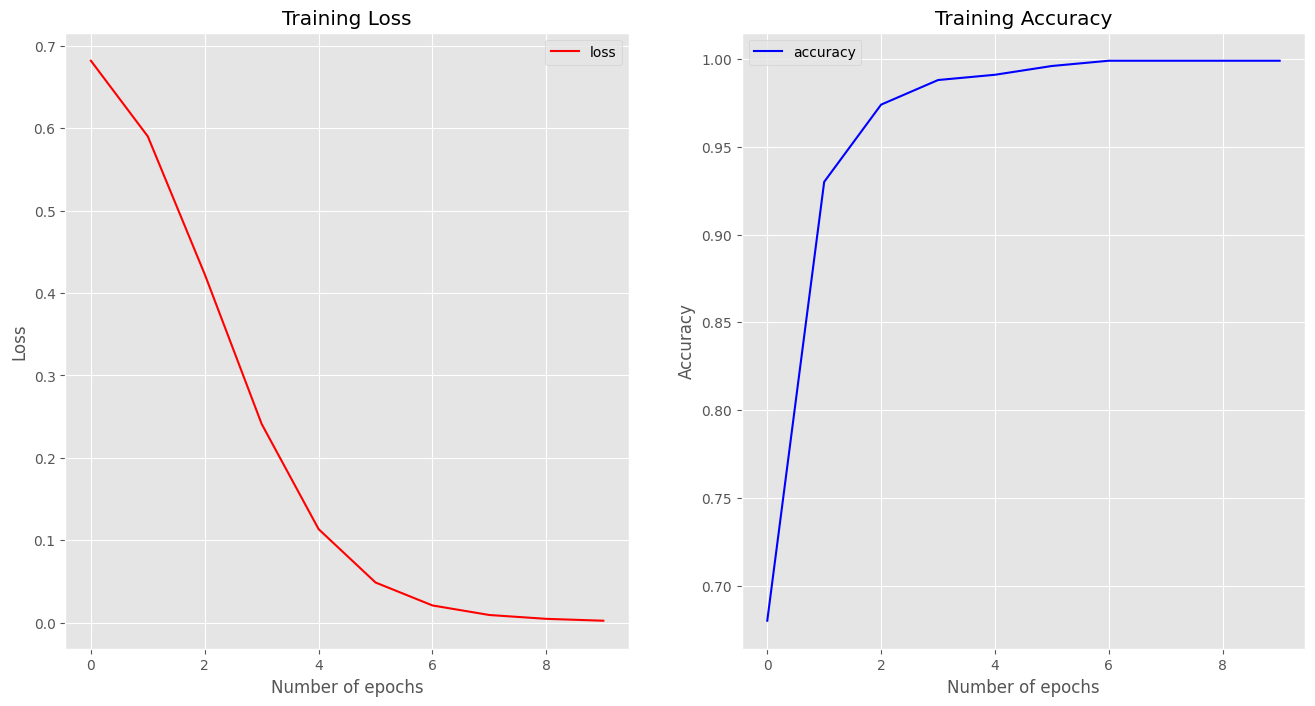

In [44]:
#plot graphy of accuracy and loss to see changes of epochs
plt.figure(figsize=(16, 8))

# Subplot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

# Subplot for Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


<font size = "5">Using Adam Optimizer </font>

In [45]:
#for adam optimizer we set datatype to float 32 bit - we can also use for regression problem
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')


In [46]:
model = Sequential()                         #defining
model.add(Dense(units=16, activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [56]:
#As optimizer is regression problem, we use mean_squraed as It measures the average squared difference between the true and predicted values.
#Adam adjusts the learning rates of each parameter individually, based on both the first-order gradients and exponentially
#decaying average of past gradients. It is known for its efficiency and effectiveness in a wide range of scenarios.


In [48]:
history = model.fit(x_train, y_train, batch_size= 10, epochs= 10)

Epoch 1/10
100/100 [==============================] - 9s 78ms/step - loss: 0.2417 - accuracy: 0.6460
Epoch 2/10
100/100 [==============================] - 8s 76ms/step - loss: 0.1495 - accuracy: 0.9620
Epoch 3/10
100/100 [==============================] - 8s 78ms/step - loss: 0.0389 - accuracy: 0.9960
Epoch 4/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0083 - accuracy: 0.9990
Epoch 5/10
100/100 [==============================] - 8s 82ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 8s 80ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 8s 79ms/step - loss: 8.6157e-04 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 8s 78ms/step - loss: 5.7387e-04 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 8s 77ms/step - loss: 4.0806e-04 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 9s 87ms/step - loss: 3.0

<font size = "5">Summary</font>

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                3539616   
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3539761 (13.50 MB)
Trainable params: 3539761 (13.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy', test_acc)

8/8 [==============================] - 0s 24ms/step - loss: 0.1173 - accuracy: 0.8520
Test loss: 0.11733465641736984
Test accuracy 0.8519999980926514


<font size = "5">Plot the graph to see accuracy and loss </font>

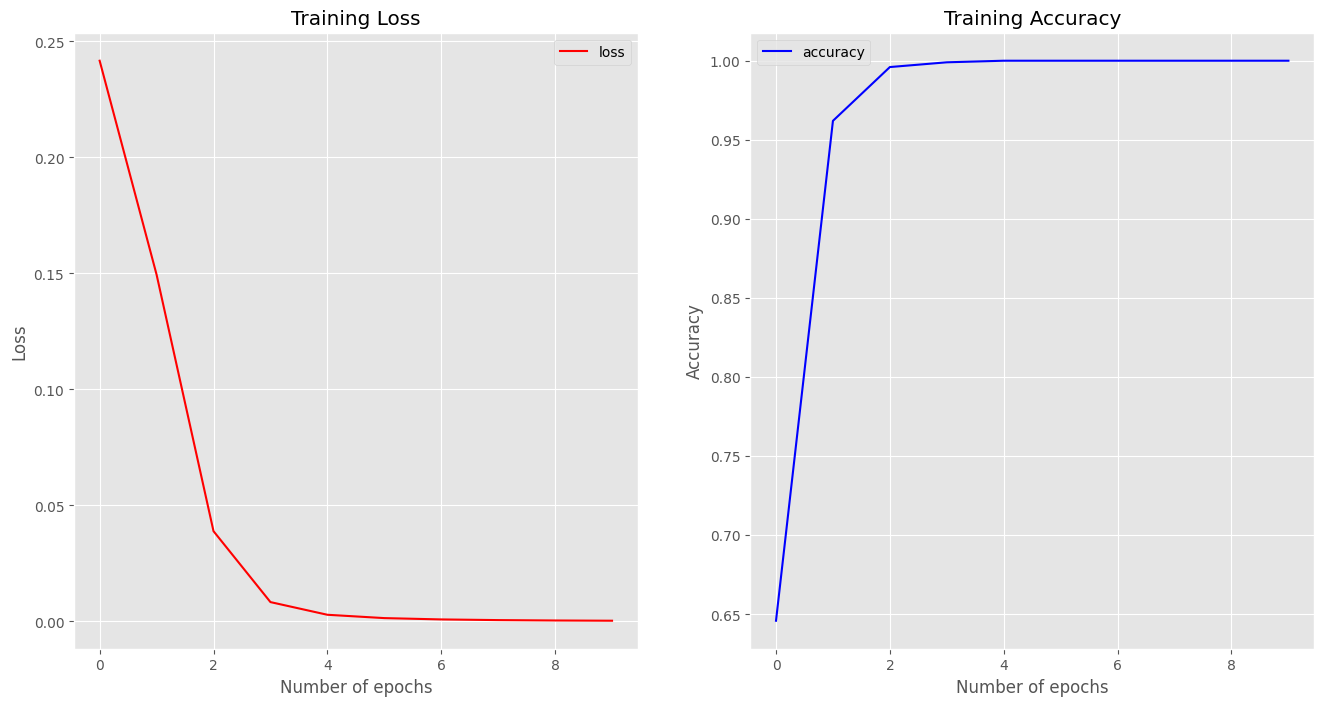

In [51]:
plt.figure(figsize=(16, 8))

# Subplot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

# Subplot for Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


<font size = "5">Now check the model through Recurrent Neural networks(RNN) - LSTM </font>

In [52]:
#Importing libraries for LSTM (long short term memory) which is type of RNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer             #convert word_tokenize value into numeric form
from keras.preprocessing.sequence import pad_sequences     #provide sentences of equal length - by filling their gap by zeros
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


<font size = "5">Spliting the Data </font>

In [53]:
#spliting data in 80 and 20 - where 20 is test size
train_size = int (df.shape[0] * 0.8)
x_train = df.review[:train_size]
y_train = df.sentiment[:train_size]
x_test = df.review[train_size:]
y_test = df.sentiment[train_size:]

<font size = "5">Tokenizer the words in Matrix  </font>

In [54]:
#tokenizer the words and padding for equal input dimensions
num_words = 5000
tokenizer = Tokenizer(num_words= num_words)

tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train) 
x_train = pad_sequences(x_train, maxlen=128, truncating='post', padding='post')          #max_len = 128 if you have value less than 128, so rest of values filled wuth zeros
         #truncating means before(pre) aur after(post) sentence


In [55]:
x_train[0],len(x_train[0])

(array([  27,    4,    1,   77, 1961,   42, 1060,   11,  100,  144,   39,
         548, 3185,  406,  444,   25, 3176,   33,   22,  203,   13,    9,
           6,  583,   46,  587,   14,   87,  145,   11, 3263,   68,   41,
        3185,   12,   28,    2,  131,    4,  581,   59,  281,    7,  203,
          35,    1,  672,  137, 1707,   68,    9,    6,   20,    3,  117,
          15,    1,   38,    9,  117, 2374,   56,   14,    5, 1414,  381,
          38,  581,   28,    6, 3387,    7,    1,  351,  337,    4,    1,
           6,  463, 3185,   13,   11,    6,    1,  344,    5,    1, 2575,
        1076,    8, 2567, 1378,   19,  527,   32, 4772, 2528,    4,    1,
        1175,  113,   30,    1,   24, 2878,    2,  402,   37,    6,   20,
         318,   19,    1, 4908, 3611,  527,    6,  339,    5, 4753, 2294,
           2,  324,    2,   22,  107,  228,   54]),
 128)

In [56]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen=128, truncating='post', padding='post')


In [57]:
x_test[0], len(x_test[0])

(array([  10,   39,  202,    9,   18,   29,    1,   18, 1390,  632,    2,
         417,    8,    1, 4290,   12, 3596,    7,  249, 2014,   13,   32,
         167,  292,   23,  280,  464,    5,   23, 1564, 1024,   10,  272,
         246,   44,   10,   12,  160,    5,   63,    8,   80,   51,   10,
         325,   41,    8,   10,  410,    1,  312,    4,    3, 1564, 1024,
           8, 2555,   50,  211,    5,   68,   17,  167,  292,   67,   68,
        3587,   11,    1,   18,   54,   25,  235,    4, 2394,    2,  345,
          17,   10,  826,    5,  190,    8,    3,  347,   10,  224, 1209,
          11,   10,  112,    8,   12,   20, 2394,    2,  345,    7,    1,
         218,   11,  404,   12,   78,  151,    7,    3, 1029,   96,   17,
          20, 2050,    2,  841,    5,  368,  807,   12, 1291,    7,    9,
         217,   26, 3442,    1,  117,   10,   83]),
 128)

In [58]:
#after spliting the data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
#39964 is training data and and 10,000 for testing purpose 

(39664, 128) (39664,)
(9916, 128) (9916,)


<font size = "5">Level encoding for Y values </font>

In [59]:
#sklearn
le = LabelEncoder()                                  #creating object of label encoder
y_train = le.fit_transform(y_train)                  #his line fits the LabelEncoder on the training labels y_train and transforms them into numerical labels.
                                     #The fit_transform method essentially maps each unique class in y_train to a unique integer.
y_test = le.transform(y_test)                         #This line uses the same LabelEncoder instance (le) to transform the test labels y_test

<font size = "5">Defining Model for RNN-LSTM </font>

In [64]:
#creating base model

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim=100, input_length=128, trainable= True))       #embedding creating our input layer. The length of each
                #sentence is 128 and trainable is true. 100 nodes in output layer
model.add(LSTM(100, dropout=0.1, return_sequences=True))  
model.add(LSTM(100, dropout=0.1))                                      #100 layers for LSTM
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<font size = "5">Summary</font>

In [65]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 100)          500000    
                                                                 
 lstm_1 (LSTM)               (None, 128, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 660901 (2.52 MB)
Trainable params: 660901 (2.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))           #training the model


Epoch 1/5


620/620 [==============================] - 5416s 9s/step - loss: 0.4354 - accuracy: 0.7952 - val_loss: 0.3522 - val_accuracy: 0.8449
Epoch 2/5
620/620 [==============================] - 489s 788ms/step - loss: 0.3268 - accuracy: 0.8655 - val_loss: 0.3450 - val_accuracy: 0.8554
Epoch 3/5
620/620 [==============================] - 389s 629ms/step - loss: 0.2906 - accuracy: 0.8829 - val_loss: 0.3611 - val_accuracy: 0.8495
Epoch 4/5
620/620 [==============================] - 411s 663ms/step - loss: 0.2555 - accuracy: 0.8999 - val_loss: 0.3619 - val_accuracy: 0.8534
Epoch 5/5
620/620 [==============================] - 433s 699ms/step - loss: 0.2206 - accuracy: 0.9153 - val_loss: 0.3732 - val_accuracy: 0.8440


<font size = "5">Plotting graph for training Loss</font>

C:\Users\hp\AppData\Local\Temp\ipykernel_1340\1135994016.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['loss'], 'b', label = 'Training loss', color = 'red')


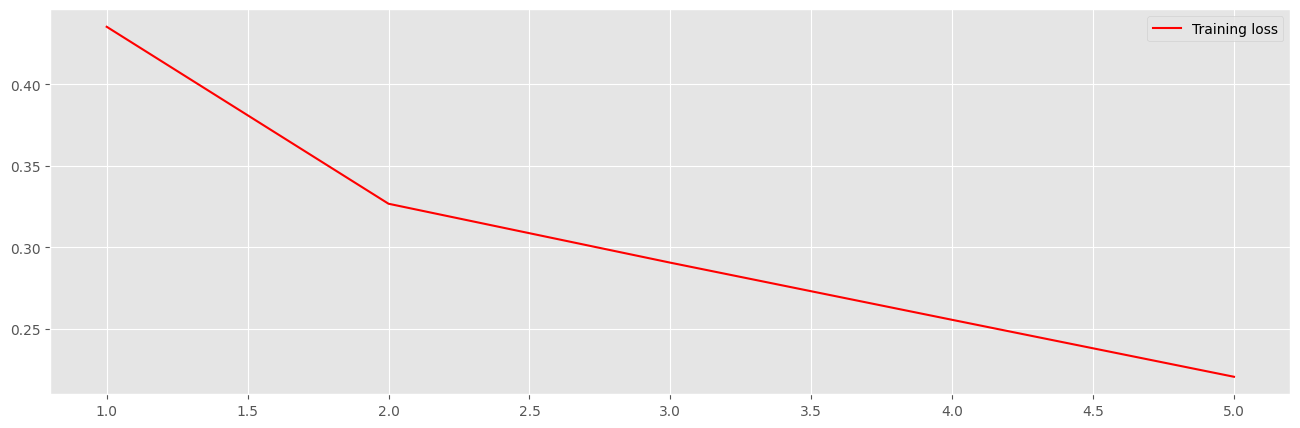

In [67]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'], 'b', label = 'Training loss', color = 'red')
#plt.plot(epochs, history.history['val_loss'], 'b', label = 'validation loss')
plt.legend()
plt.show()

<font size = "5">Plotting graph for training accuracy</font>

C:\Users\hp\AppData\Local\Temp\ipykernel_1340\3270703291.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['accuracy'], 'b', label = 'Training Accuracy', color = 'red')


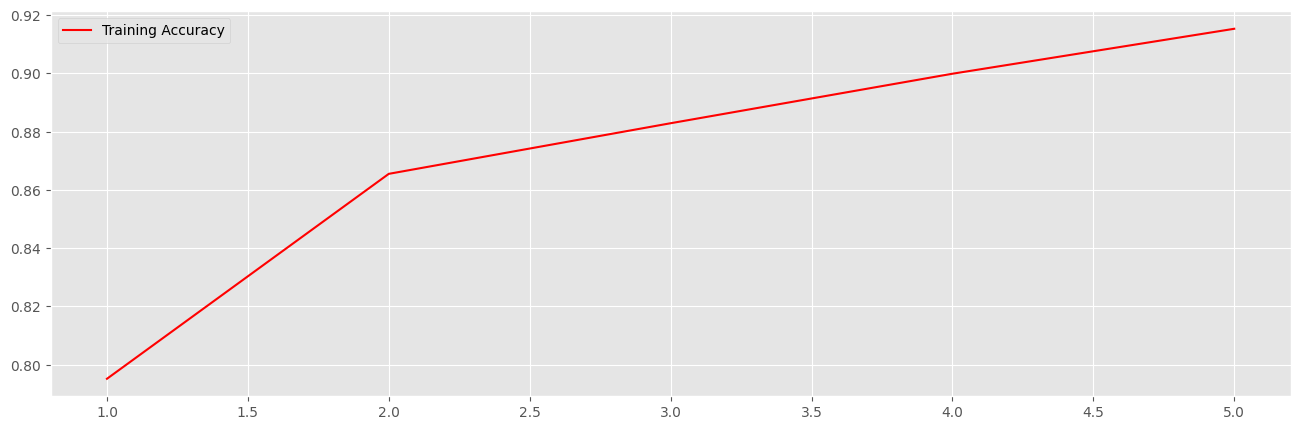

In [69]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'b', label = 'Training Accuracy', color = 'red')
#plt.plot(epochs, history.history['val_accuracy'], 'b', label = 'Validation Accuracy')
plt.legend()
plt.show()

<font size = "5">Checking the Probability of Positivity in Sentence</font>

In [70]:
validation_sentence = ['This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all']
validation_sentence_tokened=tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded=pad_sequences(validation_sentence_tokened, maxlen=128,
                                         truncating='post', padding='post')
print(validation_sentence[0])
print("Probability of positive:{}".format(model.predict(validation_sentence_padded)[0]))


This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all
1/1 [==============================] - 9s 9s/step
Probability of positive:[0.558093]


In [71]:
validation_sentence=['It had some bad parts like the storyline although the actors performed really well and that is why overall I enjoyed it.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128,
                                          truncating='post',padding='post')
print(validation_sentence[0])
print("Probability of Positive:{}".format(model.predict(validation_sentence_padded)[0]))




It had some bad parts like the storyline although the actors performed really well and that is why overall I enjoyed it.
1/1 [==============================] - 0s 78ms/step
Probability of Positive:[0.78326905]


In [72]:
validation_sentence = ['I can watch this movie forever just because of the beauty in its cinematography']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128,
                                           truncating='post', padding='post')
print(validation_sentence[0])
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))


I can watch this movie forever just because of the beauty in its cinematography
1/1 [==============================] - 0s 92ms/step
Probability of Positive: [0.7580743]


In [78]:
validation_sentence = ['Do not liking this movie at all. Flop']
validation_sentence_tokened=tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded=pad_sequences(validation_sentence_tokened, maxlen=128,
                                         truncating='post', padding='post')
print(validation_sentence[0])
print("Probability of positive:{}".format(model.predict(validation_sentence_padded)[0]))

Do not liking this movie at all. Flop
1/1 [==============================] - 0s 67ms/step
Probability of positive:[0.4063193]
